# Reddit's ranking algorithms overview

## Hot algorithm

In [4]:
from datetime import datetime, timedelta
from math import log
import matplotlib.pyplot as plt
epoch = datetime(1970, 1, 1)

In [2]:
def epoch_seconds(date):
    td = date - epoch
    return td.days * 86400 + td.seconds + (float(td.microseconds) / 1000000)

def get_w(z):
    if (z>0):
        return 1
    elif (z==0) :
        return 0
    elif (z<0):
        return -1
def get_m(z):
    if (abs(z)>=1):
        return abs(z)
    elif (abs(z)<1):
        return 1

def get_ts(date):
    return epoch_seconds(date) - 1134028003

def get_z(u,d):
    return u - d

def hot(ts,w,m):
    order = log(m, 10)
    return round(order + (w * ts)/45000, 7)

Score for a post with 100 upvotes and 2 downvotes, published now: 10141.7058049
Score for a post with 100 upvotes and 2 downvotes, published 10 hours ago: 10140.9058049
Score for a post with 100 upvotes and 2 downvotes, published 24 hours ago: 10139.7858049
Score for a post with 100 upvotes and 2 downvotes, published 48 hours ago: 10137.8658049


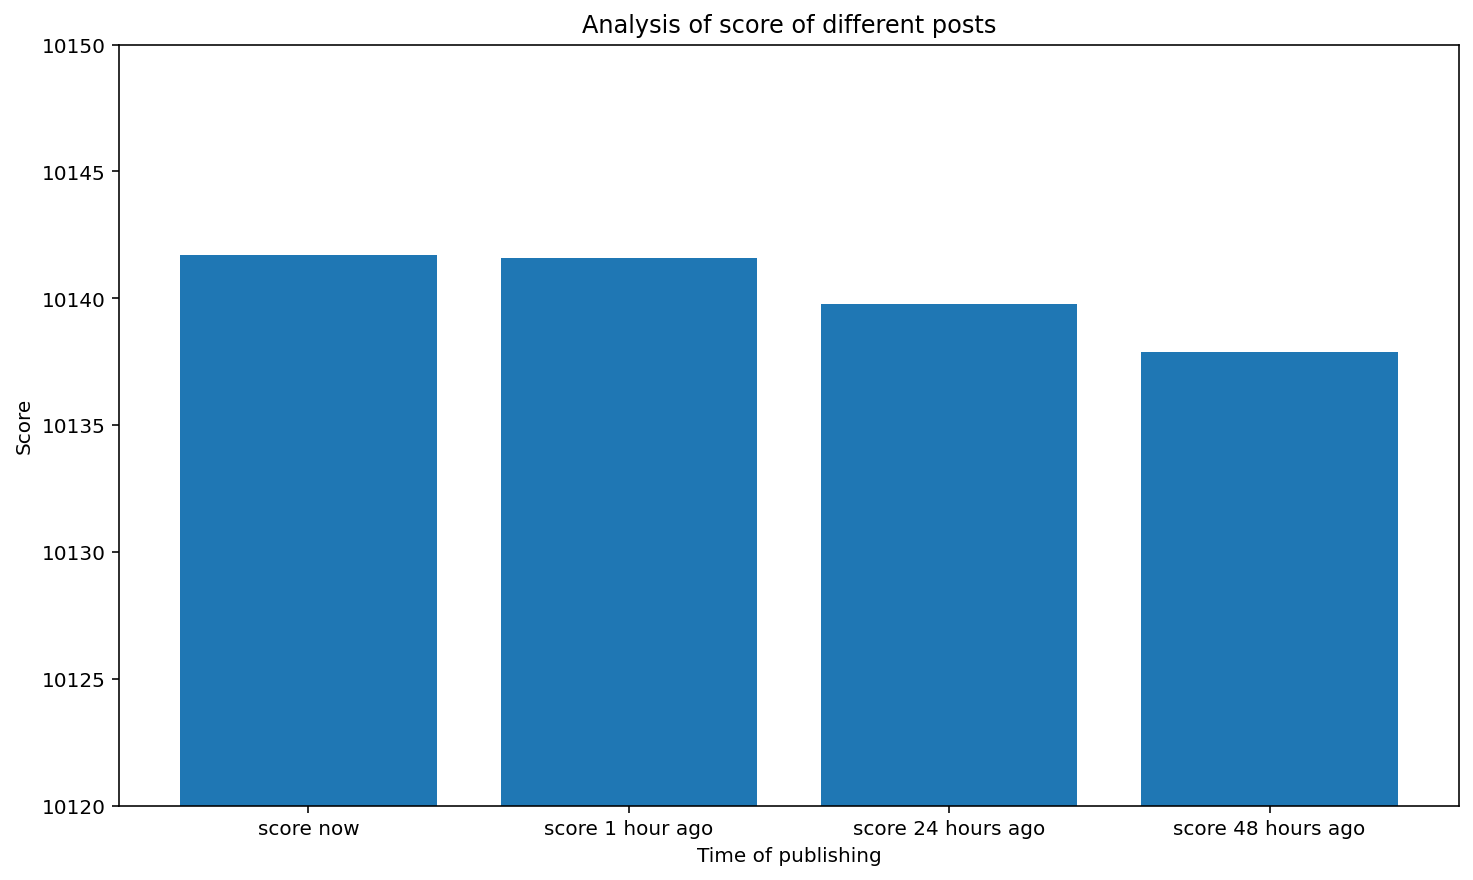

In [25]:
ts_now = get_ts(datetime.now())
ts_10_hour_ago = get_ts(datetime.now() - timedelta(hours=10))
ts_24_hour_ago = get_ts(datetime.now() - timedelta(hours=24))
ts_48_hour_ago = get_ts(datetime.now() - timedelta(hours=48))



z = get_z(100,2)
m = get_m(z)
w = get_w(z)
score_now = hot(ts_now,w,m)
score_10_hour_ago = hot (ts_10_hour_ago,w,m)
score_24_hour_ago = hot (ts_24_hour_ago,w,m)
score_48_hour_ago = hot (ts_48_hour_ago,w,m)


print("Score for a post with 100 upvotes and 2 downvotes, published now: "+str(score_now))
print("Score for a post with 100 upvotes and 2 downvotes, published 10 hours ago: "+str(score_10_hour_ago))
print("Score for a post with 100 upvotes and 2 downvotes, published 24 hours ago: "+str(score_24_hour_ago))
print("Score for a post with 100 upvotes and 2 downvotes, published 48 hours ago: "+str(score_48_hour_ago))






plt.bar(['score now','score 1 hour ago','score 24 hours ago','score 48 hours ago'],[score_now,score_1_hour_ago,score_24_hour_ago,score_48_hour_ago])
plt.ylabel('Score')
plt.xlabel('Time of publishing')
plt.title('Analysis of score of different posts')
plt.axis([None, None, 10120, 10150])
plt.show()


## Logarithm function 

0.0043648054024501


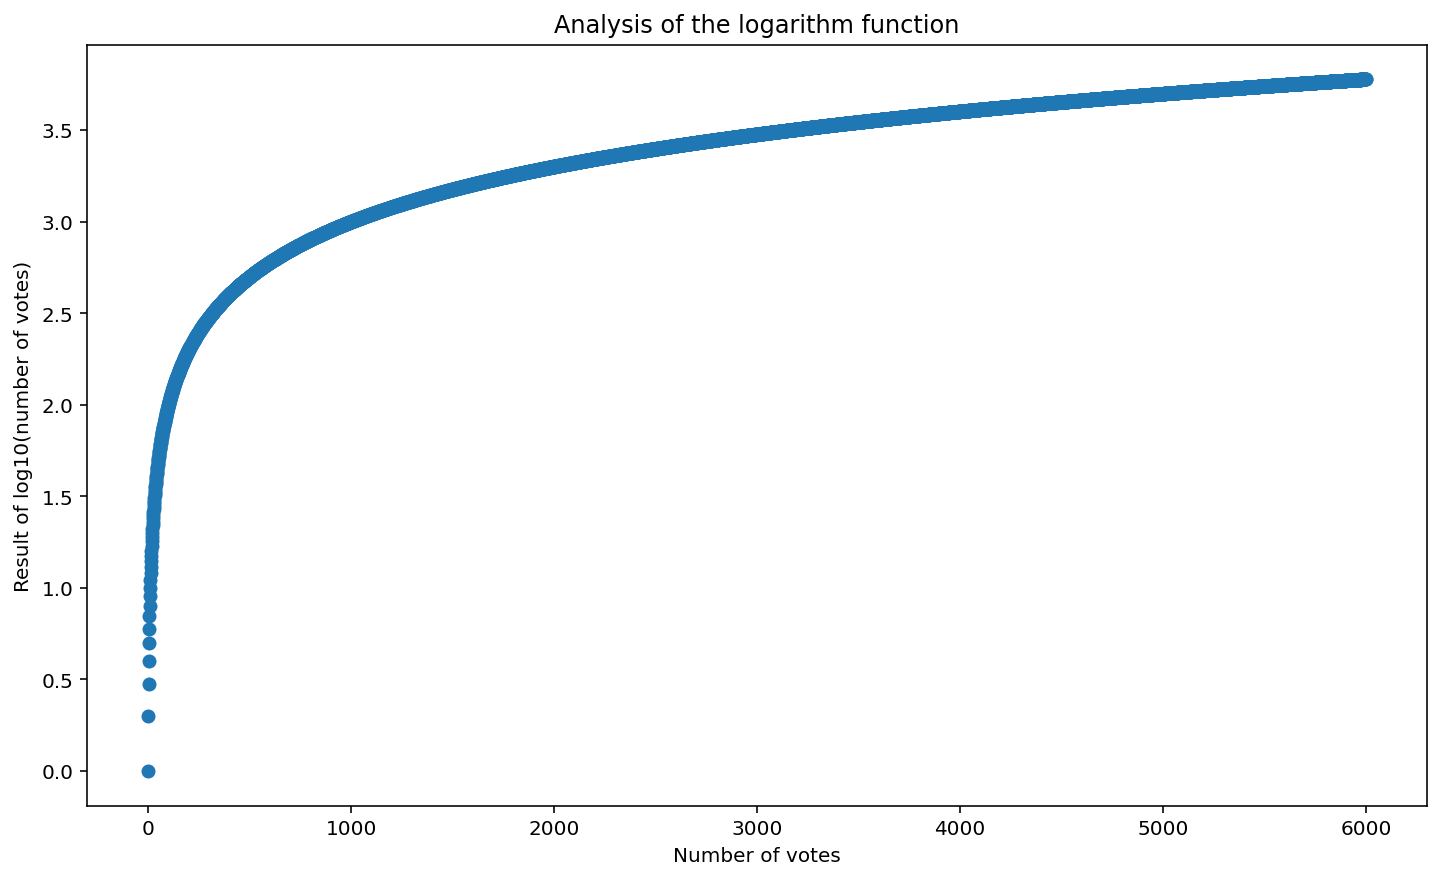

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = list(range(1, 6000, 1))
y = [np.log10(p) for p in x]



plt.scatter(x, y)
plt.ylabel('Result of log10(number of votes)')
plt.xlabel('Number of votes')
plt.title('Analysis of the logarithm function')
plt.show()

## Contribution of my vote

Weight of a vote for a post with 20 votes: 0.021714724095162587
Weight of a vote for a post with 70 votes: 0.0062042068843321686


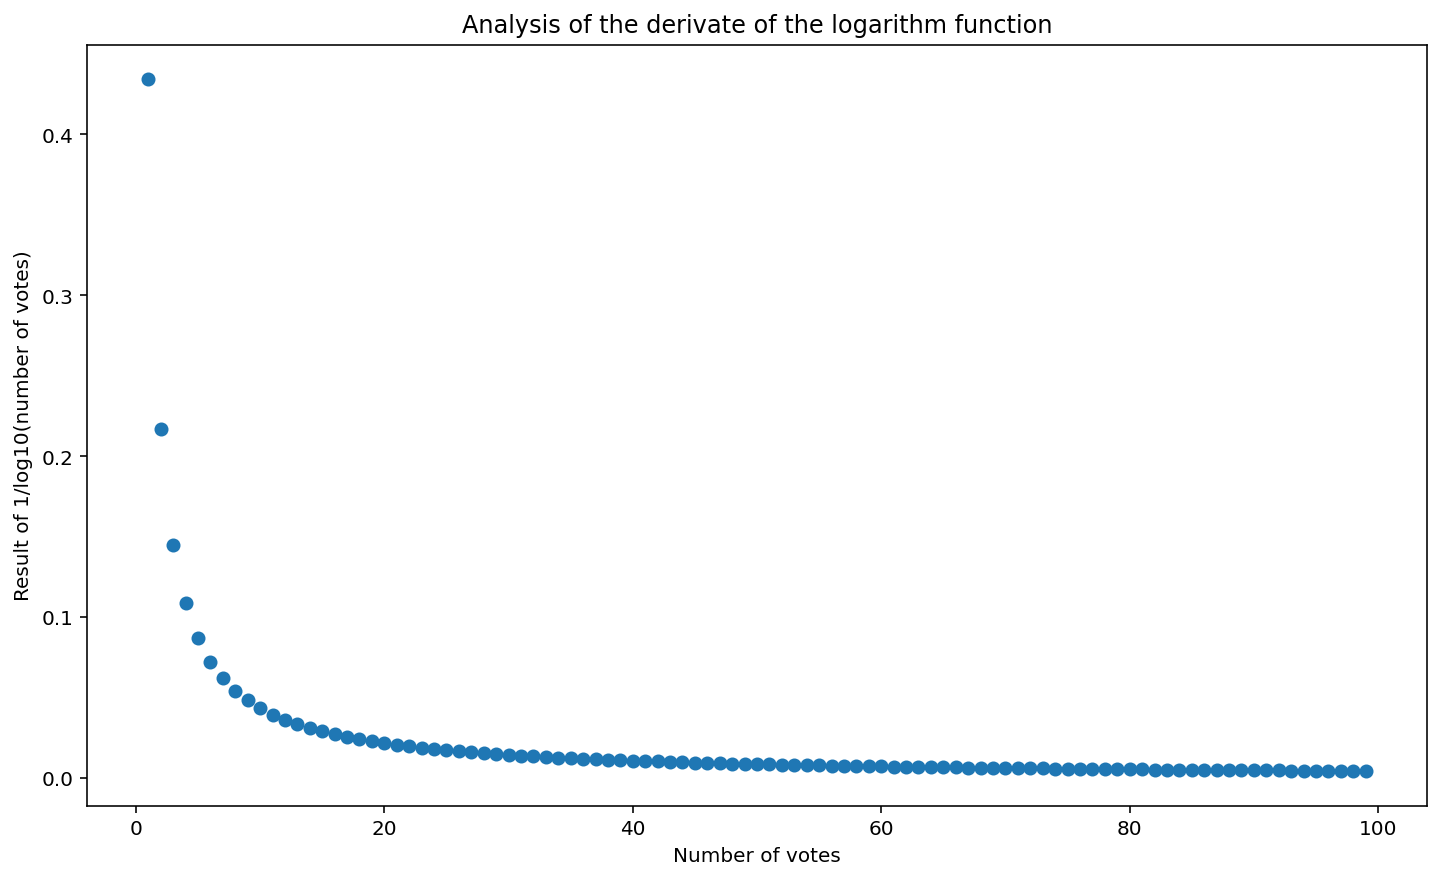

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = list(range(1, 100, 1))
y = [1/(np.log(10)*p) for p in x]
weight_20=1/(np.log(10)*20)
weight_70=1/(np.log(10)*70)
print("Weight of a vote for a post with 20 votes: "+str(weight_20))
print("Weight of a vote for a post with 70 votes: "+str(weight_70))

plt.scatter(x, y)
plt.ylabel('Result of 1/log10(number of votes)')
plt.xlabel('Number of votes')
plt.title('Analysis of the derivate of the logarithm function')
plt.show()

## Same number of votes

Score for a post with 100 upvotes and 98 downvotes, published now: 10140.069936
Score for a post with 1000 upvotes and 998 downvotes, published now: 10140.069936


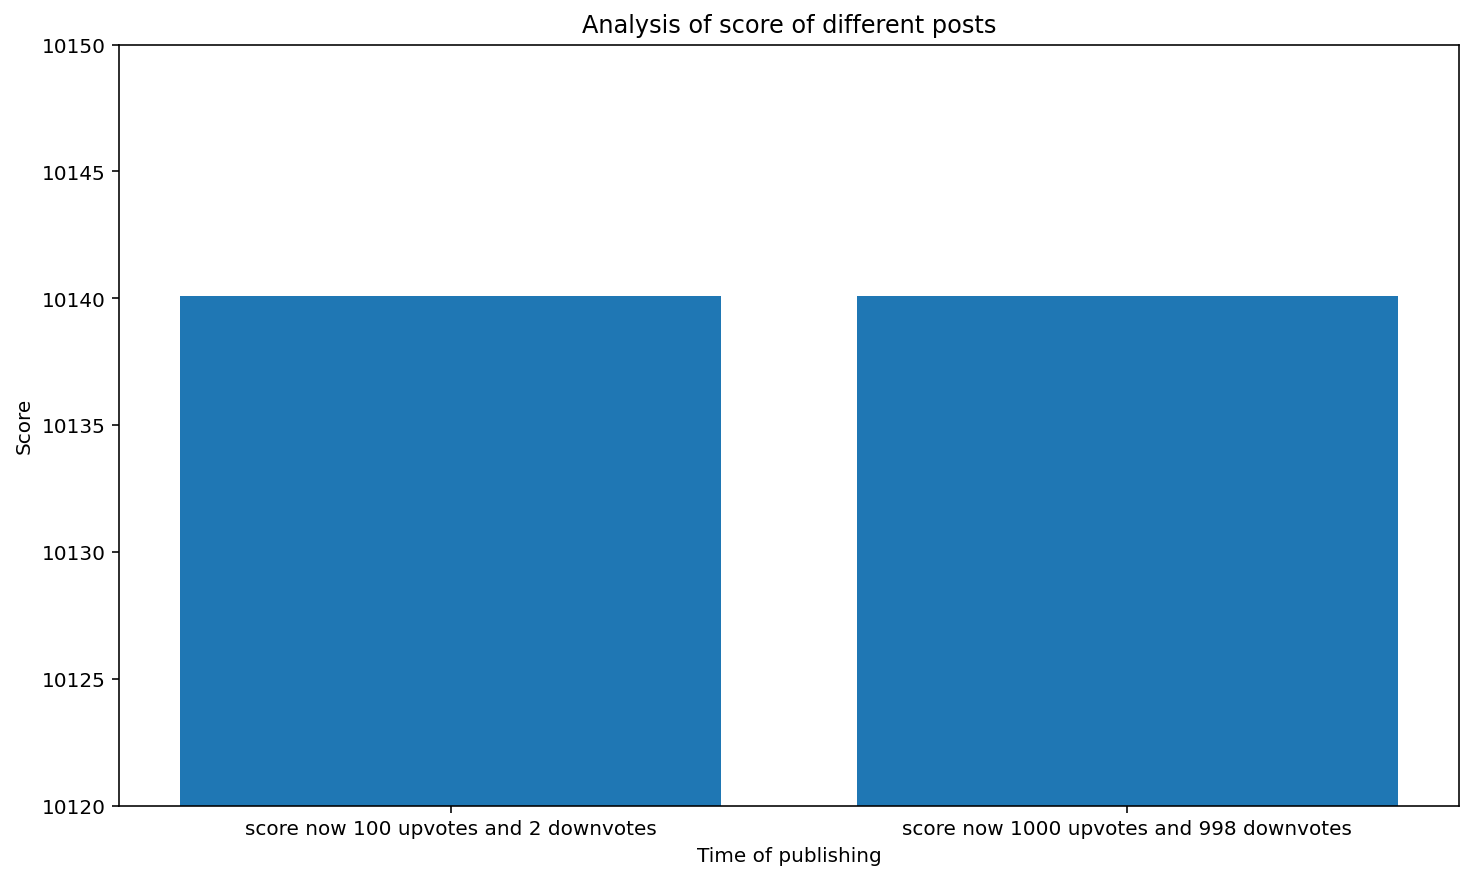

In [5]:
ts_now = get_ts(datetime.now())

z_1 = get_z(100,98)
m_1 = get_m(z_1)
w_1 = get_w(z_1)

z_2 = get_z(1000,998)
m_2 = get_m(z_2)
w_2 = get_w(z_2)

score_now_1 = hot(ts_now,w_1,m_1)
score_now_2 = hot(ts_now,w_2,m_2)

print("Score for a post with 100 upvotes and 98 downvotes, published now: "+str(score_now_1))
print("Score for a post with 1000 upvotes and 998 downvotes, published now: "+str(score_now_2))

plt.bar(['score now 100 upvotes and 2 downvotes','score now 1000 upvotes and 998 downvotes'],[score_now_1,score_now_2])
plt.ylabel('Score')
plt.xlabel('Time of publishing')
plt.title('Analysis of score of different posts')
plt.axis([None, None, 10120, 10150])
plt.show()


## Different number of votes

Score for a post with 100 upvotes and 98 downvotes, published now: 10140.0757416
Score for a post with 1000 upvotes and 2 downvotes, published now: 10142.7738421


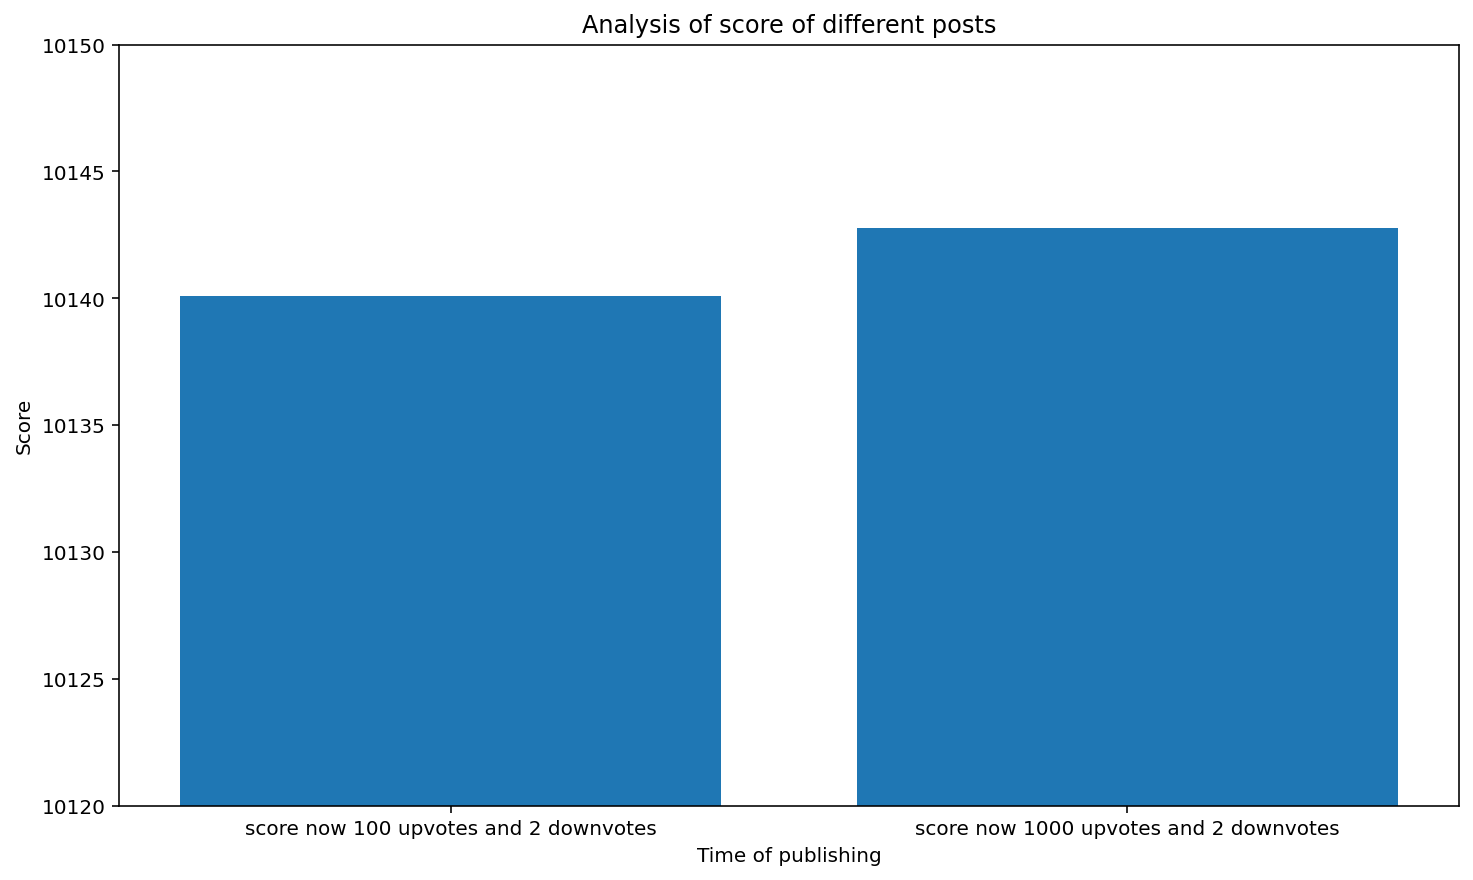

In [6]:
ts_now = get_ts(datetime.now())

z_1 = get_z(100,98)
m_1 = get_m(z_1)
w_1 = get_w(z_1)

z_2 = get_z(1000,2)
m_2 = get_m(z_2)
w_2 = get_w(z_2)

score_now_1 = hot(ts_now,w_1,m_1)
score_now_2 = hot(ts_now,w_2,m_2)

print("Score for a post with 100 upvotes and 98 downvotes, published now: "+str(score_now_1))
print("Score for a post with 1000 upvotes and 2 downvotes, published now: "+str(score_now_2))

plt.bar(['score now 100 upvotes and 2 downvotes','score now 1000 upvotes and 2 downvotes'],[score_now_1,score_now_2])
plt.ylabel('Score')
plt.xlabel('Time of publishing')
plt.title('Analysis of score of different posts')
plt.axis([None, None, 10120, 10150])
plt.show()

## Confidence Algorithm

In [2]:

import math

def confidence (ups,downs):
    n = ups + downs

    if n == 0:
        return 0

    z = 1.281551565545

    p = ups / n
    left = p + (z*z)*(1/(2*n))
    right = z * math.sqrt((p*(1-p)*1/n)+(z*z)/(4*(n*n)))
    under = 1 + ((z*z)/n)

    return (left - right) / under


Score for a comment with 1 upvotes and 0 downvotes: 0.37844750322520615
Score for a comment with 40 upvotes and 20 downvotes: 0.5851513139588391


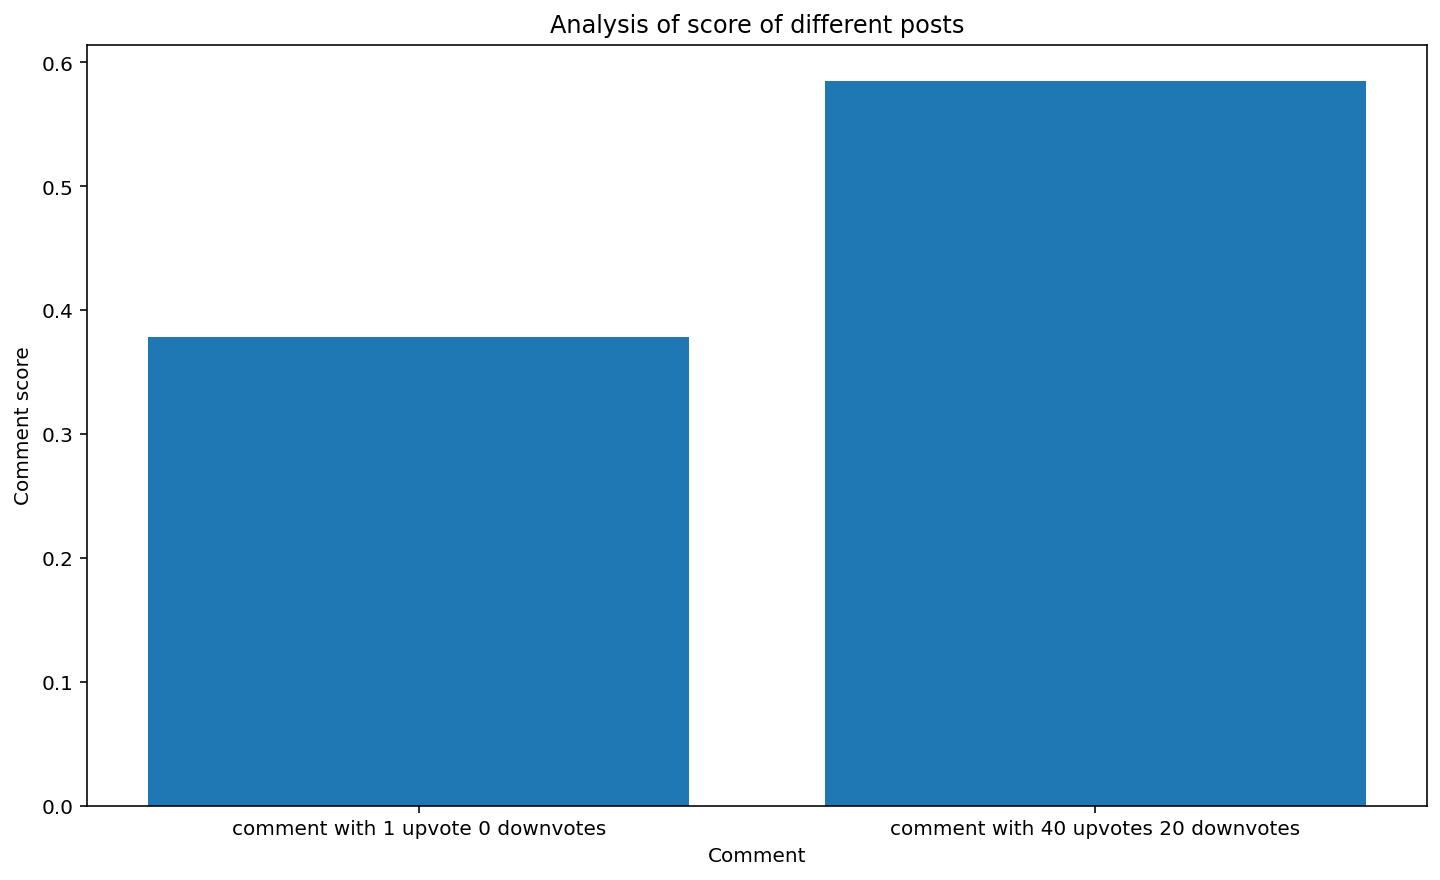

In [4]:
import matplotlib.pyplot as plt
import numpy as np

score_1 = confidence(1,0)
score_2 = confidence(40,20)


print("Score for a comment with 1 upvotes and 0 downvotes: "+str(score_1))
print("Score for a comment with 40 upvotes and 20 downvotes: "+str(score_2))
plt.bar(['comment with 1 upvote 0 downvotes','comment with 40 upvotes 20 downvotes'],[score_1,score_2])
plt.ylabel('Comment score')
plt.xlabel('Comment')
plt.title('Analysis of score of different posts')
plt.show()

Score for a comment with 10 upvotes and 1 downvotes: 0.7394949884518779
Score for a comment with 40 upvotes and 20 downvotes: 0.5851513139588391


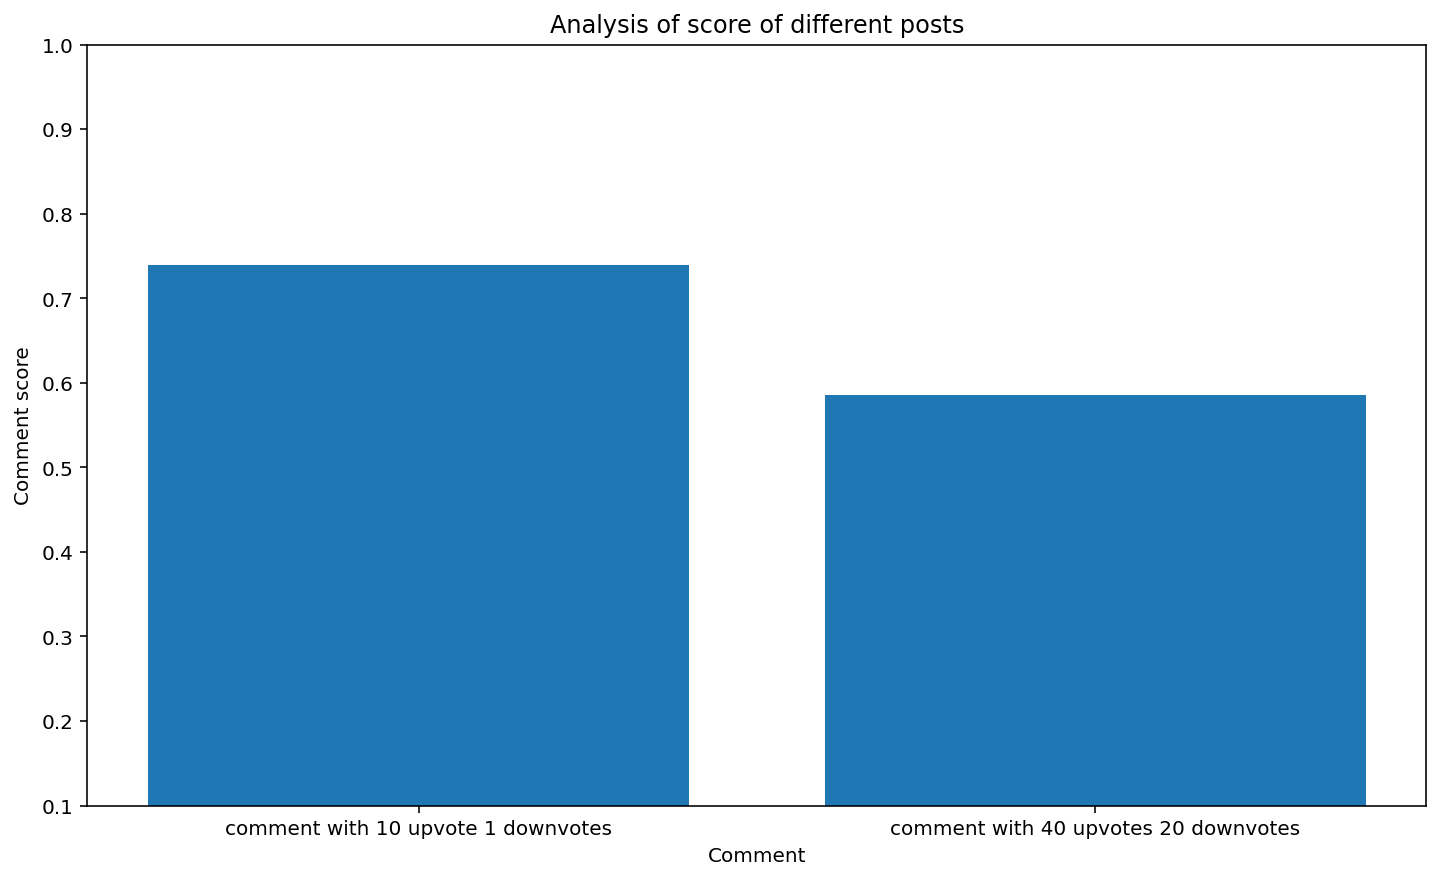

In [7]:
import matplotlib.pyplot as plt
import numpy as np

score_1 = confidence(10,1)
score_2 = confidence(40,20)


print("Score for a comment with 10 upvotes and 1 downvotes: "+str(score_1))
print("Score for a comment with 40 upvotes and 20 downvotes: "+str(score_2))
plt.bar(['comment with 10 upvote 1 downvotes','comment with 40 upvotes 20 downvotes'],[score_1,score_2])
plt.ylabel('Comment score')
plt.xlabel('Comment')
plt.title('Analysis of score of different posts')
plt.axis([None, None, 0.1, 1])
plt.show()